## **EDA on Students Performance**

Importing Libraries and Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report


data = pd.read_csv('StudentsPerformance.csv')
print(data)


     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

## Data Cleaning

In [7]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
pass                           0
dtype: int64


In [6]:
# Create target variable: pass (1) if average score >= 40, else fail (0)
data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data['pass'] = (data['average_score'] >= 40).astype(int)
data.drop(columns='average_score', inplace=True)

# Show class distribution
print("\nPass/Fail counts:\n", data['pass'].value_counts())


Pass/Fail counts:
 pass
1    970
0     30
Name: count, dtype: int64


##Data Analysis

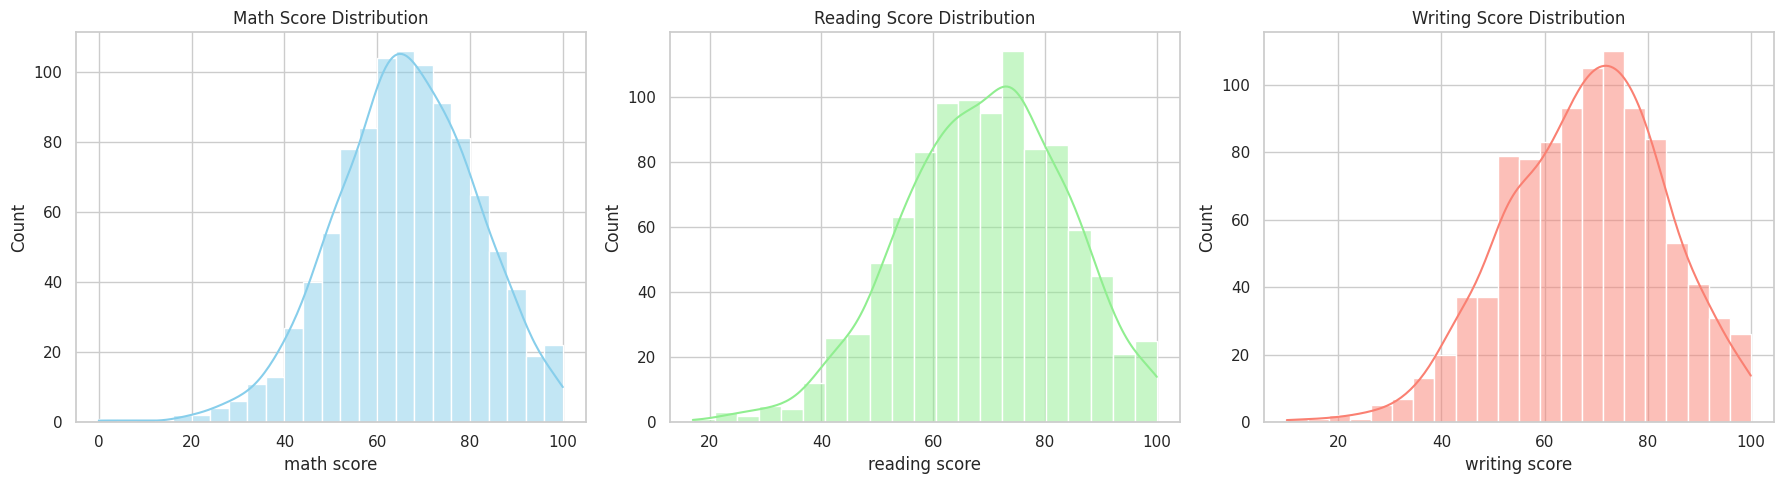

In [8]:
# 4️⃣ Exploratory Data Analysis (EDA)

sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['math score'], kde=True, color='skyblue')
plt.title("Math Score Distribution")

plt.subplot(1, 3, 2)
sns.histplot(data['reading score'], kde=True, color='lightgreen')
plt.title("Reading Score Distribution")

plt.subplot(1, 3, 3)
sns.histplot(data['writing score'], kde=True, color='salmon')
plt.title("Writing Score Distribution")

plt.tight_layout()
plt.show()


<ipython-input-10-02bf6a424470>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='pass', palette='Set2')


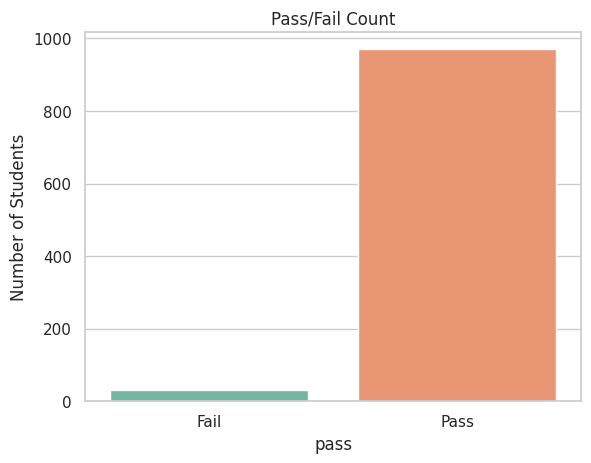

In [10]:
# Pass/Fail count
sns.countplot(data=data, x='pass', palette='Set2')
plt.title("Pass/Fail Count")
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.ylabel("Number of Students")
plt.show()


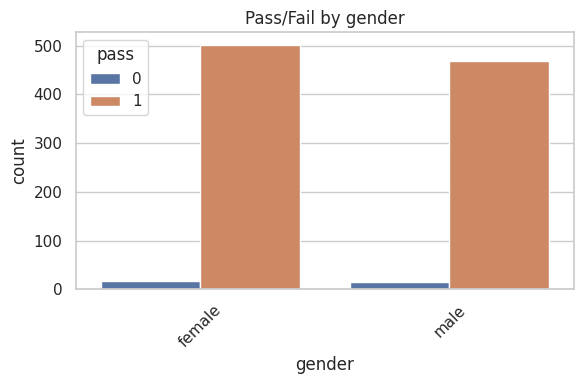

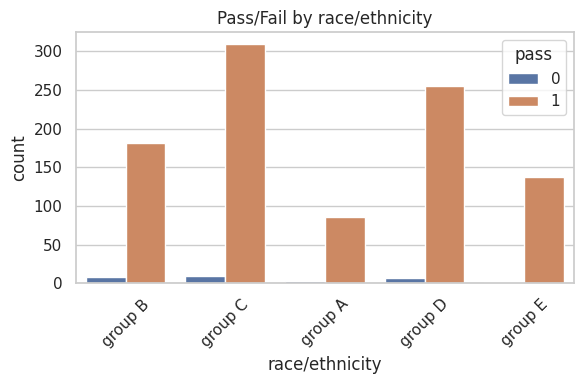

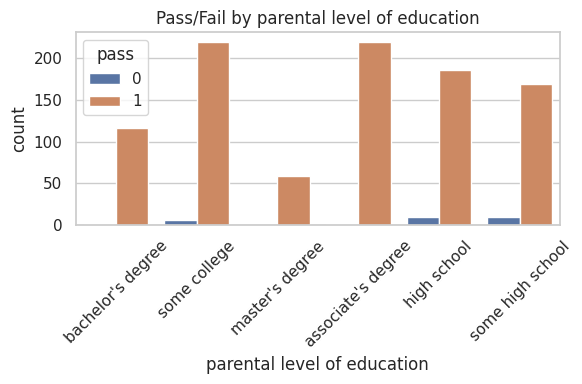

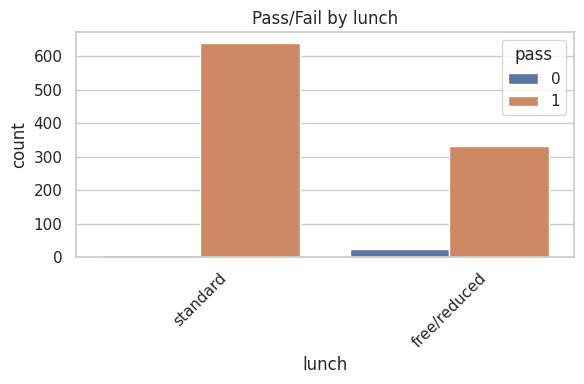

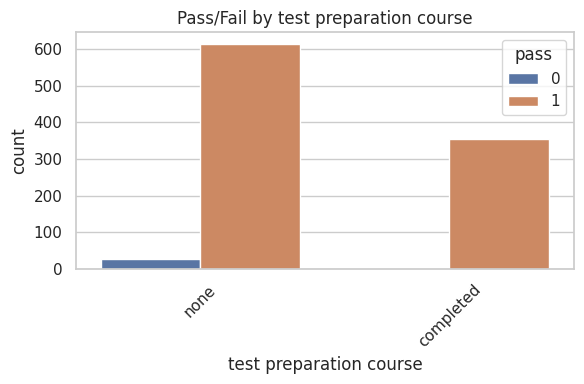

In [11]:
# Categorical vs Pass Rate
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='pass')
    plt.title(f"Pass/Fail by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Preprocessing for ML

In [12]:
# Encode categorical features
data_encoded = data.copy()
le = LabelEncoder()

for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Features & target
X = data_encoded.drop(columns=['pass'])
y = data_encoded['pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model 1: Logistic Regression

In [13]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluation
print("🔍 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


🔍 Logistic Regression Results:
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 10   0]
 [  0 190]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Model 2: Random Forest Classifier

In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🌲 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🌲 Random Forest Results:
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 10   0]
 [  0 190]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

